In [4]:
# </path/to>/build/bin/hipace <input>

import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
from scipy import constants
# from openpmd_viewer import OpenPMDTimeSeries
# from openpmd_viewer.addons import LpaDiagnostics

from mpl_toolkits.axes_grid1 import make_axes_locatable

# import sys
# sys.path.append('/Users/max/HiPACE/hipace/tools/')
# import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')


d = 'none'
# d = 'behind'
# d = 'front'
# d = 'salameTest'

p = f'/Users/max/HiPACE/recovery/non-filament/h5/{d}/'
ip = f'/Users/max/HiPACE/recovery/non-filament/insitu/{d}/'
data = defs.Functions(path = p, insitu_path = ip, n0 = 7.8e15, iteration = 0, normalized = False, recovery = False)

# data.customCMAP()

In [3]:
print(f'(Quick) Energy Transfer Efficiency : {data.quickEfficiency(iteration = data.iteration):.2f} %')

(Quick) Energy Transfer Efficiency : 25.94 %


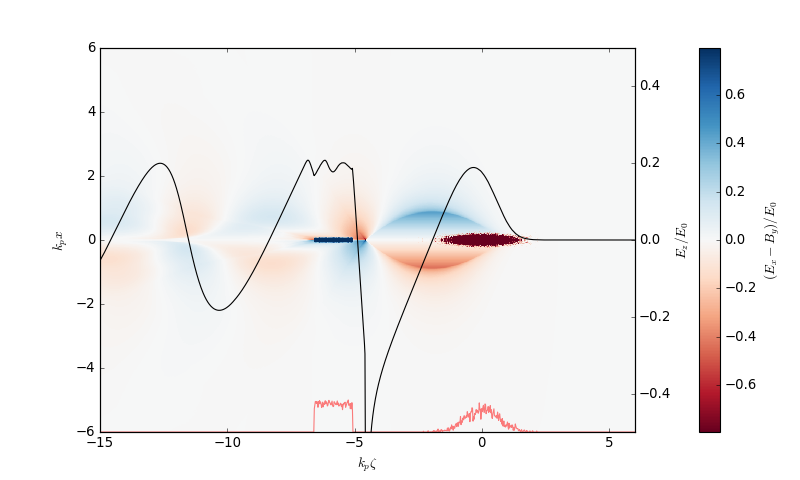

In [5]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.ExmBy.T / data.E0, cmap = 'RdBu') #, vmin = -1, vmax = 1)

# plt.scatter(kp * zd, kp * xd, s = .02, color = 'darkred', label = '$e^-$ Drive Bunch')
# plt.scatter(kp * zw, kp * xw, s = .02, color = 'b', label = '$e^+$ Witness Bunch')
# plt.scatter(kp * zr, kp * xr, s = .02, color = 'g', label = '$e^-$ Recovery Bunch')

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

plt.xlim(-15, 6)
# plt.xlim(kp * info.zmin, kp * info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

ax2 = plt.twinx()
ax2.plot(data.kp * data.info.z, data.Ez / data.E0, color = 'black')
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$(E_x - B_y)/E_0 $')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

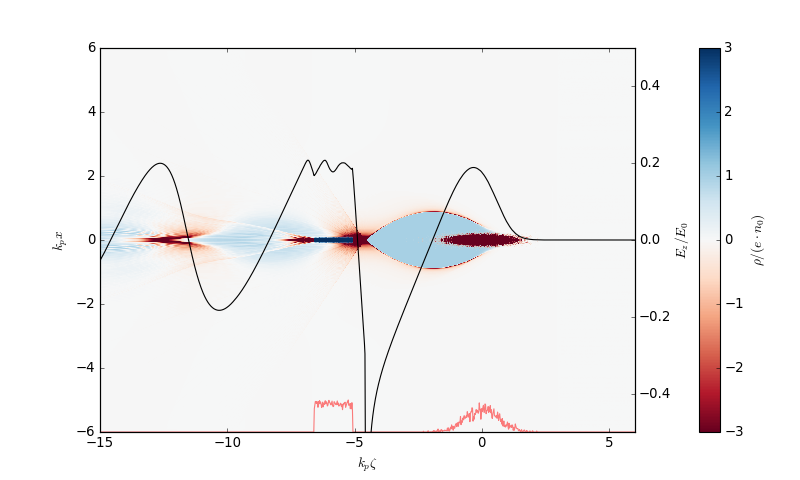

In [12]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.rho.T / (constants.e * data.n0 * 1e6), cmap = 'RdBu', vmin = -3, vmax = 3)

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

plt.xlim(-15, 6)
# plt.xlim(kp * info.zmin, kp * info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

ax2 = plt.twinx()
ax2.plot(data.kp * data.info.z, data.Ez / data.E0, color = 'black')
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

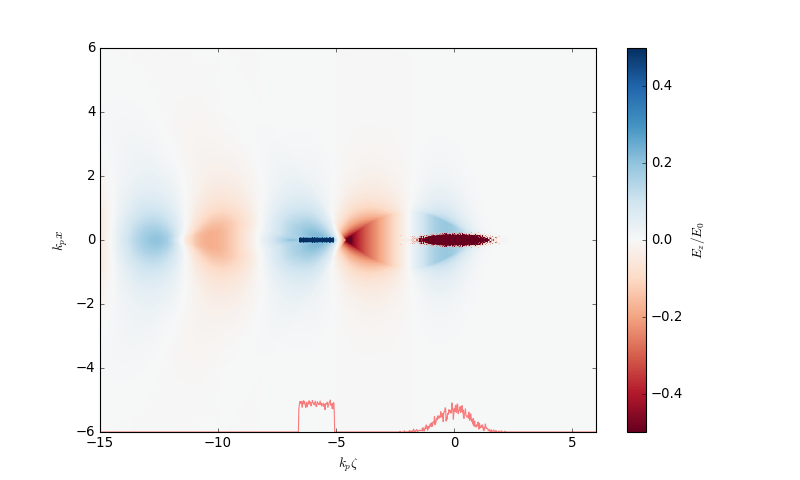

In [5]:
Ez = data.ts.get_field(field = 'Ez', iteration = data.iteration)[0]

plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, Ez.T / data.E0, cmap = 'RdBu', vmin = -.5, vmax = .5)

plt.pcolormesh(data.kp * data.info.z, data.kp * data.info.x, data.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
plt.plot(data.kp * data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

plt.xlim(-15, 6)
# plt.xlim(kp * info.zmin, kp * info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$E_z/E_0$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()